In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

part_1

In [3]:
cars = pd.read_csv("C:/Users/acer/Desktop/HW3_ML_9823033/car_data.csv")
cars.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
cars = cars.drop(columns=['User ID'])
cars

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


part_2
pie chart Age

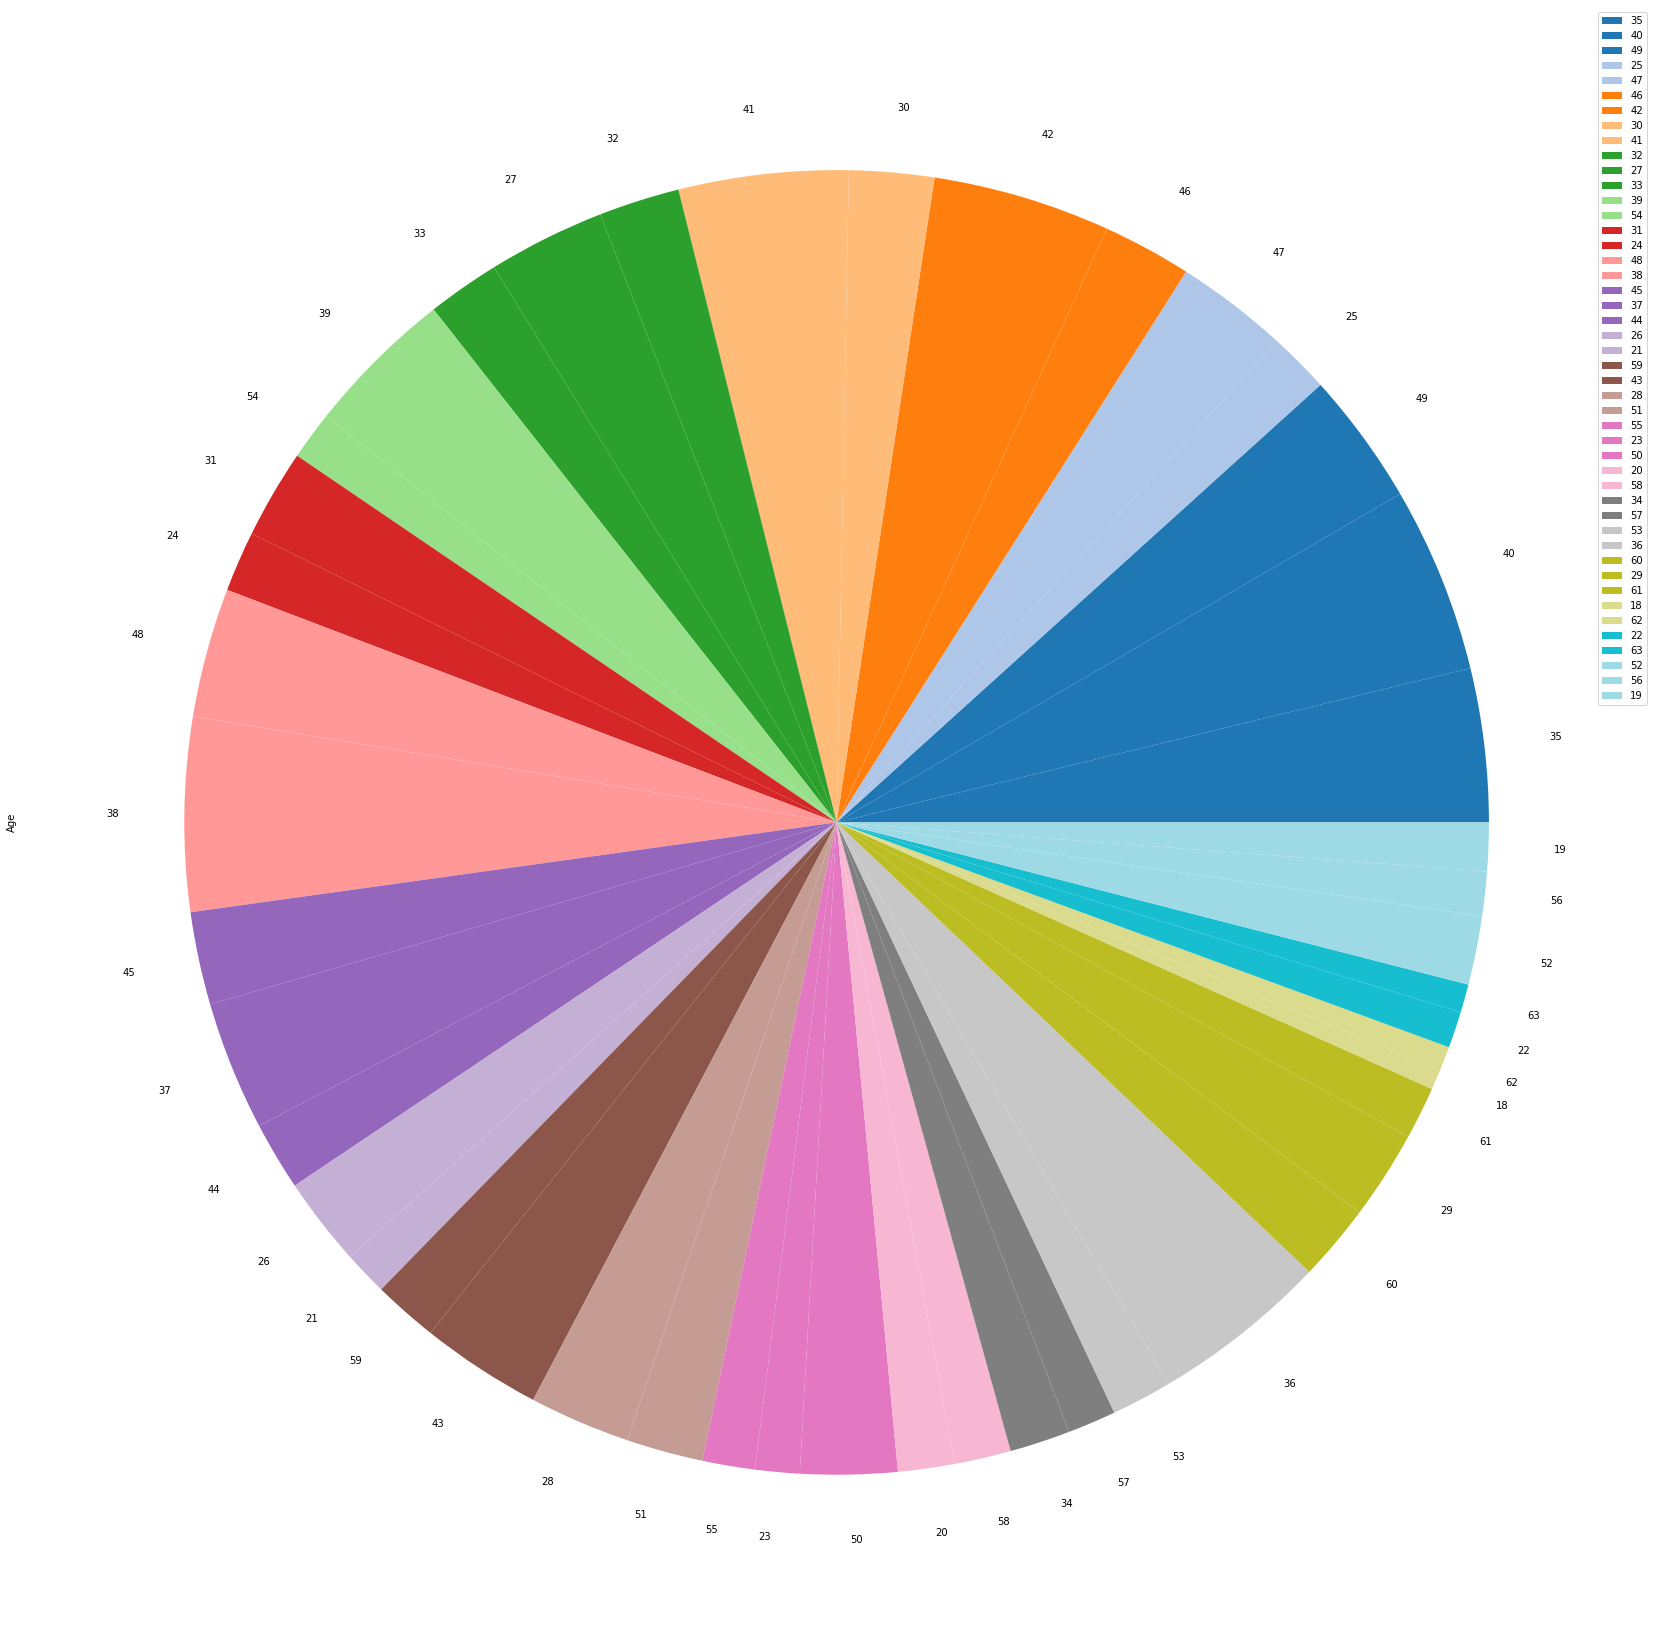

In [5]:
Age_pie = pd.DataFrame(cars['Age'].value_counts(), 
                        index = list(cars['Age'].unique()), columns = ['Age'])
plot = Age_pie.plot.pie(y = 'Age', figsize = (30, 30), cmap = 'tab20')

part2_Gender_pie_chart

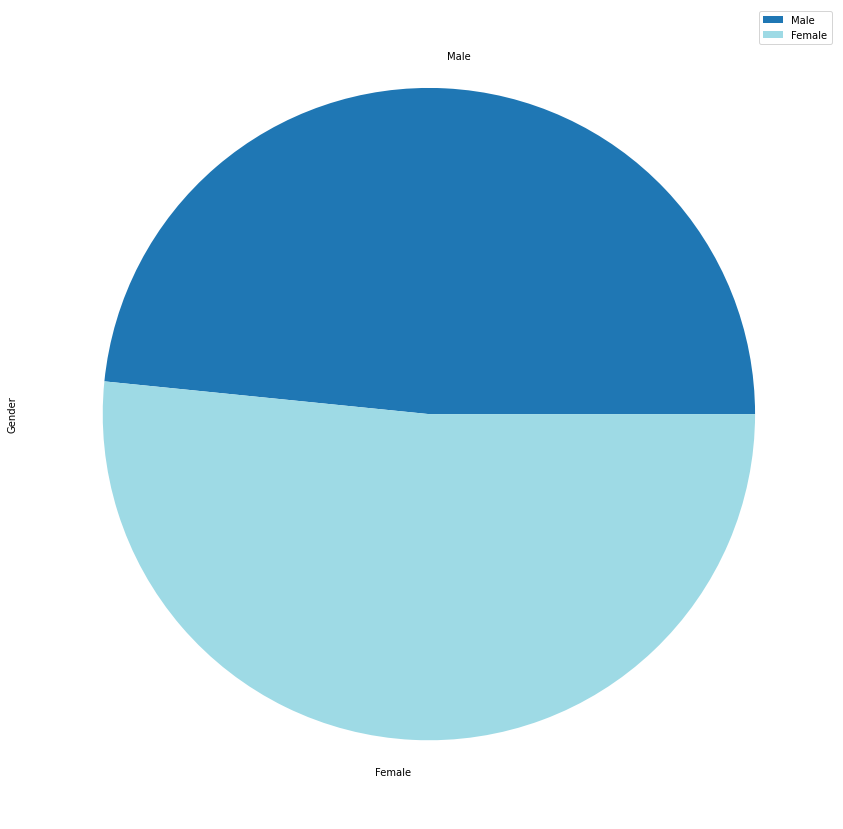

In [6]:
Gender_pie = pd.DataFrame(cars['Gender'].value_counts(), 
                        index = list(cars['Gender'].unique()), columns = ['Gender'])
plot = Gender_pie.plot.pie(y = 'Gender', figsize = (15, 15), cmap = 'tab20')

part2_Age_hist

<AxesSubplot:>

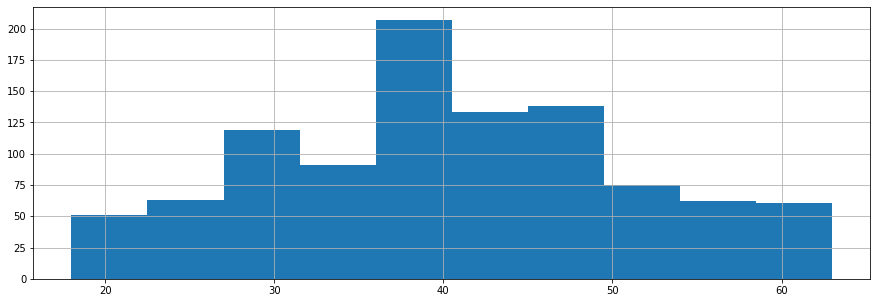

In [7]:
cars['Age'].hist(figsize = (15, 5))

part2_Gender_hist

<AxesSubplot:>

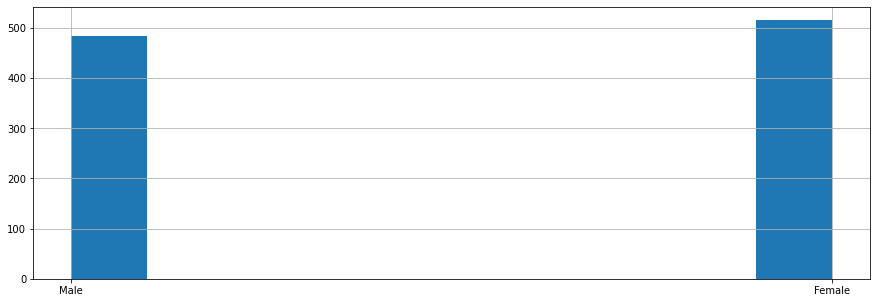

In [8]:
cars['Gender'].hist(figsize = (15, 5))

part3_converting Gender categorical feature

In [9]:
le = LabelEncoder()
label = le.fit_transform(cars['Gender'])
cars.drop("Gender", axis=1, inplace=True)
cars["Gender"] = label
cars

,Age,AnnualSalary,Purchased,Gender
0,35,20000,0,1
1,40,43500,0,1
2,49,74000,0,1
3,40,107500,1,1
4,25,79000,0,1
...,...,...,...,...
995,38,59000,0,1
996,47,23500,0,0
997,28,138500,1,0
998,48,134000,1,0


part4

In [10]:
x_cars = cars.drop(columns=['Purchased']).to_numpy()
y_cars = cars['Purchased'].to_numpy().reshape(-1, 1)

#normalization
x_cars = StandardScaler().fit_transform(x_cars)

#train test split
x_train, x_test, y_train, y_test = train_test_split(x_cars, y_cars, test_size=0.2)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 3), (800, 1), (200, 3), (200, 1))

part5

In [11]:
X_bias = np.ones((x_train.shape[0],1))
Xnew = np.hstack((x_train,X_bias))
Xnew.shape

(800, 4)

In [12]:
w=np.ones([Xnew.shape[1], 1])
w.shape

(4, 1)

In [13]:
def activation(X , W):
    z = np.dot(X, W)
    return 1 / (1 + np.exp(-z))

In [14]:
def calculate_cross_entropy(X , W , Y):
    z = activation(X, W)
    return ((-Y * np.log(z)) - ((1 - Y) * np.log(1 - z))).mean()

In [51]:
def predic_func(X , W):
    list=[]
    sigmoid = activation(X , W)
    
    for i in range(X.shape[0]):
        if sigmoid[i] > 0.5:
            list.append(1) 
        else:
            list.append(0)
    return list  

In [52]:
def calculate_accuracy(Y , y_pred):
    incorrect_count = 0
    
    for i in range(Y.shape[0]):
        if y_pred[i] == Y[i]:
            incorrect_count += 1
            
    return incorrect_count / Y.shape[0]

In [43]:
def calculate_logistic(X , Y , W , alpha , iteration):
    cost_history=[]
    accuracy_history=[]
    
    for i in range(iteration):
        f_model = activation(X , W)
        W = W - (alpha * (np.dot((f_model-Y).T , X).T)/Y.shape[0])
        cost = calculate_cross_entropy(X , W , Y)
        y_predict = predic_func(X , W)
        train_accuracy = calculate_accuracy(Y , y_predict)
        
        accuracy_history.append(train_accuracy)
        cost_history.append(cost)
        
    return w , cost_history , accuracy_history

part6

6.073759e-01


Text(0, 0.5, 'Cost')

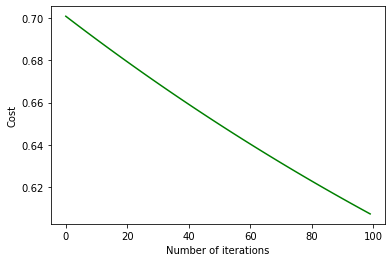

In [44]:
#100 iterations
w , cost_list , accuracy_list = calculate_logistic(Xnew , y_train , w , 0.01 , 100)
print("{:e}".format(cost_list[len(cost_list)-1]))

plt.plot(range(100), cost_list, c='green')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Accuracy')

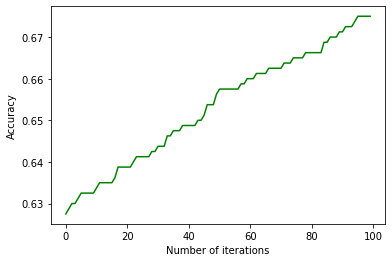

In [45]:
plt.plot(range(100), accuracy_list, c='green')
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")

3.710653e-01


Text(0, 0.5, 'Cost')

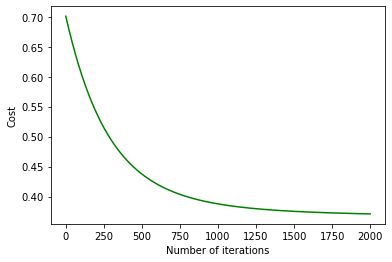

In [47]:
#2000 iterations

w , cost_list , accuracy_list = calculate_logistic(Xnew , y_train , w , 0.01 , 2000)
print("{:e}".format(cost_list[len(cost_list)-1]))

plt.plot(range(2000), cost_list, c='green')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Accuracy')

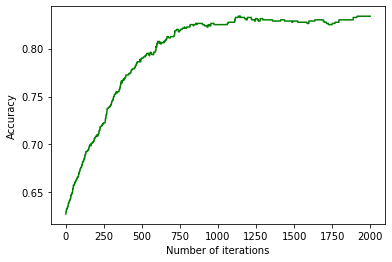

In [48]:
plt.plot(range(2000), accuracy_list, c='green')
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")

3.663813e-01


Text(0, 0.5, 'Cost')

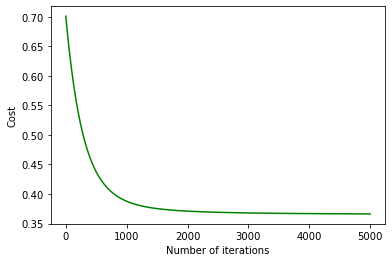

In [49]:
#5000 iterations

updated_w , cost_list , accuracy_list = calculate_logistic(Xnew , y_train , w , 0.01 , 5000)
print("{:e}".format(cost_list[len(cost_list)-1]))

plt.plot(range(5000), cost_list, c='green')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Accuracy')

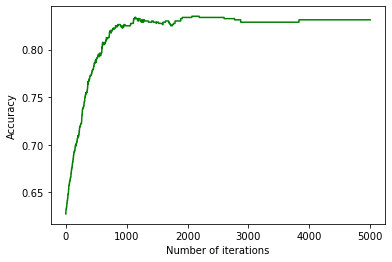

In [50]:
plt.plot(range(5000), accuracy_list, c='green')
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")

part7

In [53]:
X_bias = np.ones((x_test.shape[0],1))
Xnew_test = np.hstack((x_test,X_bias))
Xnew_test.shape

y_predict = predic_func(Xnew_test , updated_w)
test_accuracy = calculate_accuracy(y_test , y_predict)
test_accuracy

0.61

In [54]:
test_cost = calculate_cross_entropy(Xnew_test , updated_w , y_test)
test_cost

0.7597369903864795